## Titanic Survival Prediction

### Problem Statement:

To build a model that predicts whether a passenger on the Titanic survived or not.

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing titanic dataset
data = pd.read_csv("C:\\Vikram\\Datasets\\titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning:

After looking at the dataset, we understood that the variables 'PassengerId', 'Name', 'Ticket', 'Cabin' are of no use while building a model for prediction. So we will remove these variables from the original dataset.

In [3]:
# Dropping the unecessary columns
df = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
# Checking null values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We observed that there are some **NaN** values (or null values). Most of the null values are present in only in the Age column, so we will replace these values with average of Age column. Also, we observed two null values in Embarked column, so we will simply remove those values.

In [5]:
df.Age.mean()

29.69911764705882

In [6]:
# Filling Nan values with column mean
df.Age.fillna(value=df.Age.mean(),inplace=True)
# Droping rest of the NaN values
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Data Visualization:

Let us now visualize if there is any relation between "Survival and Gender", and "Survival and Embarked" by plotting their graphs.

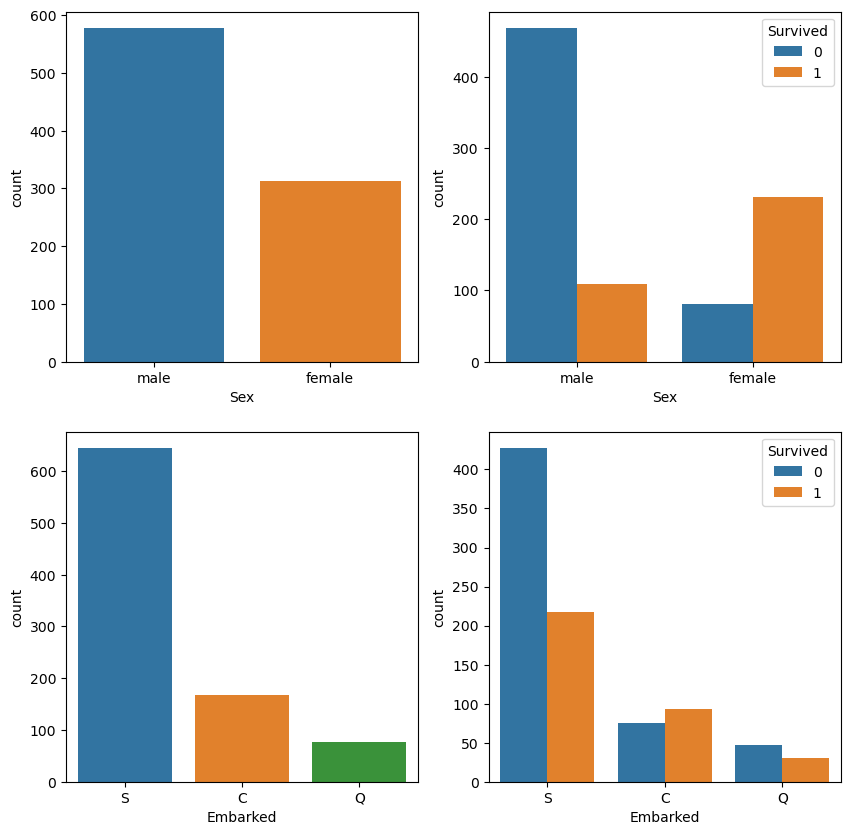

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data = df,x="Sex")
plt.subplot(2,2,2)
sns.countplot(data = df,x="Sex", hue="Survived")
plt.subplot(2,2,3)
sns.countplot(data = df,x="Embarked")
plt.subplot(2,2,4)
sns.countplot(data = df,x="Embarked", hue="Survived")
plt.show()

In [9]:
m_S = round(df.Age[df.Survived==1].mean(),2)
m_D = round(df.Age[df.Survived==0].mean(),2)
print("Average ages of Survived Passanges is {} years.".format(m_S))
print("Average ages of Died Passanges is {} years.".format(m_D))

Average ages of Survived Passanges is 28.42 years.
Average ages of Died Passanges is 30.42 years.


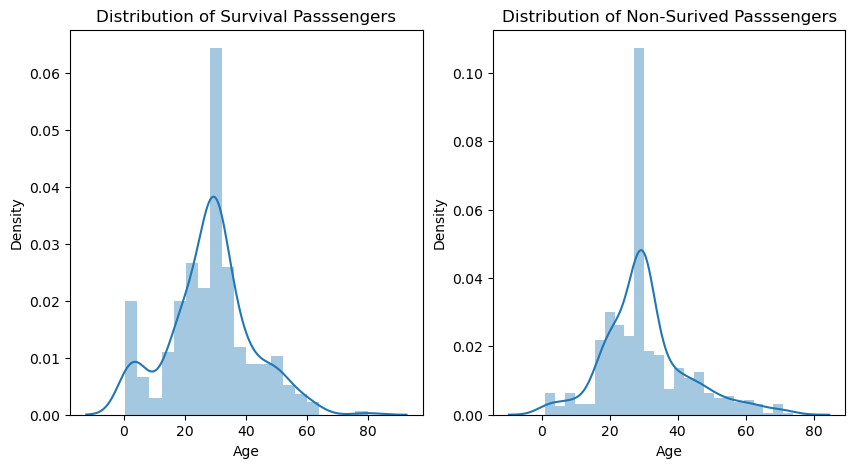

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df.Age[df.Survived==1])
plt.title("Distribution of Survival Passsengers")
plt.subplot(1,2,2)
sns.distplot(df.Age[df.Survived==0])
plt.title("Distribution of Non-Surived Passsengers")
plt.show()

### Observations from the Graphs:

- There were more more men than women onboard on the Titanic. While more women were survived compared to that of men in Titanic.
- Among all the three Embarked types, the survival rate of **C type Embarked** passangers is high compared rest of the two types.
- The distribution of **Survived** passangers as well as **Non_survived** passangers is more or less similar with averages **28.42 years** and **30.42 years** respectively.

### Preparing data to fit classification models

The columns "Sex" and "Embarked" are categorical columns. The machine learning algoriths do not consider categories while fitting the model, so we need to get dummy columns for each individual categories for those columns.

In [11]:
dummies = pd.get_dummies(df,columns=['Sex','Embarked'])
dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,False,True,False,False,True
1,1,1,38.000000,1,0,71.2833,True,False,True,False,False
2,1,3,26.000000,0,0,7.9250,True,False,False,False,True
3,1,1,35.000000,1,0,53.1000,True,False,False,False,True
4,0,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,False,True,False,False,True
887,1,1,19.000000,0,0,30.0000,True,False,False,False,True
888,0,3,29.699118,1,2,23.4500,True,False,False,False,True
889,1,1,26.000000,0,0,30.0000,False,True,True,False,False


To get rid of dummy trap, we will remove one dummy column from each of the categorical columns. Moreover, if we will not remove extra dummy columns then the machine learning algorithms handle those dummy columns without affecting the model perfomance.

We will split the data into **features** and **labels**. Features are the independent variables used to predict the response or dependent variable. Labels column is the response variable of our interest which needs to be studied.

In [12]:
# Features
X = dummies.drop(['Survived','Sex_male','Embarked_S'],axis=1)
# Labels
y = dummies.Survived

### Model Selection:

#### K Fold cross validation

We will use K Fold validation technique to test the performance of model and choose best model with highest accuracy score.

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10)

### Importing the necessary classifiers from the Scikit-Learn module.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [15]:
LR = cross_val_score(LogisticRegression(),X,y, cv = kfold)
LR.mean()

0.7930796731358529

In [16]:
RF = cross_val_score(RandomForestClassifier(),X,y, cv=kfold)
RF.mean()

0.8032048008171604

In [17]:
SV = cross_val_score(SVC(),X,y, cv = kfold)
SV.mean()

0.6771833503575077

In [18]:
NB = cross_val_score(BernoulliNB(),X,y, cv=kfold)
NB.mean()

0.7840015321756896

### Observations:

This shows that the random forest algorithm performs better with maximum score compared to rest of the classification algorithms. So we will use Random Forest algorithm to classify the survived and non-survived passangers in titanic dataset.

### Predictions:

Let us now make a prediction using Random Forest classifier for randomly selected passenger. Consider a passenger with the following information.
- Pclass: 3
- Age: 21 years
- SibSp: 2
- Parch: 0
- Fare: 24.15
- Sex: Male
- Embarked: S

We need to form an array in the form, 

**x0** = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Embarked_C',
       'Embarked_Q'] = **[3, 21, 2, 0, 24.15, False, False, False]**

In [19]:
rf = RandomForestClassifier()
rf.fit(X,y)
rf.score(X,y)

0.9820022497187851

In [20]:
x0 = [3, 21, 2, 0, 24.15, False, False, False]
rf.predict([x0])

array([0], dtype=int64)

### Conclusion:

That means, the random forest classifier classifies the passanger with Pclass: 3, Age: 21 years, SibSp: 2, Parch: 0, Fare: 24.15, Sex: Male, and Embarked: S as Non-Survived passanger with **98.20%** accuracy.